### Gelman-Rubin $\hat{R}$ statistic
- m: Number of chains
- n: Number of samples
- The variation with the chains is measured by 
$$
W = \frac{1}{m} \sum_{j=1}^m \left[ \frac{1}{n-1} \sum_{i=1}^n (y_{ij} - \overline{y}_{\cdot j })^2\right]
$$
where $\overline{y}_{\cdot j }$ is the average of $\{y_{ij}\}$

- The variation between the chains is measured by 
$$
B = \frac{n}{m-1} \sum_{j=1}^m (\overline{y}_{\cdot j} - \overline {y}_{\cdot \cdot})^2,
$$
where $\overline {y}_{\cdot \cdot}$ is the average of all $\overline{y}_{\cdot j}$

If the Markov chains have related stationary, then 
$$
E[W] = E[B] = Var(Y)
$$
- We estimate the variance $Var(Y)$ by
$$
\hat{V}  = \frac{n-1}{n} W + \frac{1}{n} B.
$$
- The Gelman-Rubin $\hat{R}$ statistic is then 
$$
\hat{R} = \sqrt{\frac{\hat{V}}{W}},
$$
which declines to 1 as $n \rightarrow \infty$
- It is suggested that we keep simulating the Markov chain until $\hat{R} < 1.1$

Other - Stan:https://mc-stan.org/users/documentati

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_R(chains):
    # chains: 2D numpy array with shape (num_chains, num_samples)
    num_chains = chains.shape[0] # number of chains m
    num_samples = chains.shape[1] # number of samples n
    chain_means = np.mean(chains, axis=1)
    all_meas = np.mean(chain_means)

    B  = num_samples / (num_chains - 1) * np.sum((chain_means - all_meas)**2)
    W = 1 / num_chains * np.sum(np.var(chains, axis=1))

    Var_hat = (num_samples - 1) / num_samples * W + 1 / num_samples * B
    R = np.sqrt(Var_hat / W)

    return R

np.random.seed(3407)
num_chains = 4 # m
num_samples = 1000 #n
chains = np.random.normal(0,1,(num_chains, num_samples)) # Normal(0,1) Distibution
#chains.shape
R_hat = get_R(chains)
print(R_hat)

0.9996701314000044


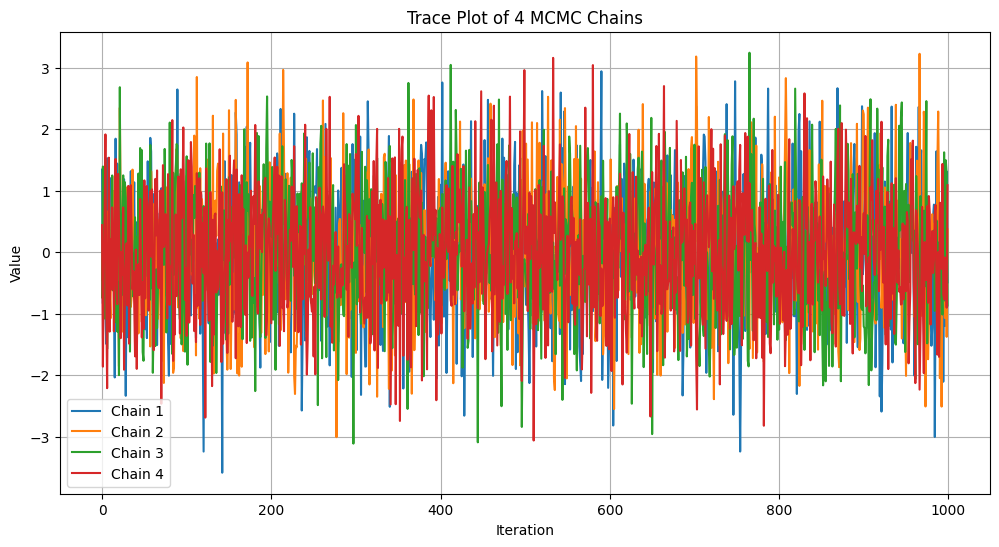

In [2]:
# Plot all chains
plt.figure(figsize=(12, 6))
for i in range(num_chains):
    plt.plot(chains[i, :], label=f'Chain {i+1}')
    
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Trace Plot of 4 MCMC Chains')
plt.legend()
plt.grid(True)
plt.show()

### Confidence Interval

In [3]:
import scipy.stats as stats
def get_confidence_interval(data,confidence):
    data_size = len(data)
    data_mean = np.mean(data)
    data_std = np.std(data,ddof=1)
    se = data_std/np.sqrt(data_size)
    z_score = stats.norm.ppf(1-(1-confidence)/2)
    confidence_interval = [data_mean - z_score*se, data_mean + z_score*se]
    return confidence_interval


chain1 = chains[0, :]
chain2 = chains[1, :]
chain3 = chains[2, :]
chain4 = chains[3, :]
for i in range(num_chains):
    current_chain = chains[i, :]
    print(f"Chain {i+1}'s Shape: {current_chain.shape[0]}")
    confidence_interval = get_confidence_interval(current_chain, 0.95)
    print(f"Chain {i+1}'s Confidence Interval: {confidence_interval}")
    if i != num_chains - 1:
        print(f'\n')

Chain 1's Shape: 1000
Chain 1's Confidence Interval: [-0.032832464681189374, 0.092910370379696]


Chain 2's Shape: 1000
Chain 2's Confidence Interval: [-0.06589663039709472, 0.05945847627570315]


Chain 3's Shape: 1000
Chain 3's Confidence Interval: [-0.05771757094452275, 0.06727962996889356]


Chain 4's Shape: 1000
Chain 4's Confidence Interval: [-0.0767584726466886, 0.04920791877505653]


# Problem 5

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
# Parameters
S_0 = 1
r = 0.05
sigma = 0.2
L = 0.8
U = 1.2
dt = 0.01
T = [1,2,5,10,20,50,100]
N  = 10000 # simulation steps

In [110]:
M  = int(T/dt)
np.random.seed(3407)
def get_S_values(S_0, r, sigma, dt, M):
    S_values = [S_0]
    Z = np.random.normal(0,1)
    for m in range(1, M+1):
        S_value = S_values[m-1] * np.exp((r - 0.5*sigma**2)*(dt) + sigma * np.sqrt(dt)* Z)
        S_values.append(S_value)
    return S_values

S_values = get_S_values(S_0, r, sigma, dt, M)

In [111]:
Barrier_option_values = []
def get_barrier_option_value(S_values, L, U, M):
    ans0 = np.exp(-r * T)
    ans1 = 1
    for m in range(1, M+1):
        if S_values[m] > L  and S_values[m] < U:
            ans1 = ans1 * 1
        else:
            ans1 = ans1 * 0
            break

    ans = ans0 * ans1
    return ans

for i in range(0,N):
    Barrier_option_value = get_barrier_option_value(get_S_values(S_0, r, sigma, dt, M), L, U, M)
    Barrier_option_values.append(Barrier_option_value)

In [112]:
Barrier_option_values = np.array(Barrier_option_values)
Barrier_option_values.mean()

0.07419589511105569

In [118]:
for w in range(len(T)):
    start_time = time.time()
    M  = int(T[w]/dt)
    np.random.seed(3407)
    def get_S_values(S_0, r, sigma, dt, M):
        S_values = [S_0]
        Z = np.random.normal(0,1)
        for m in range(1, M+1):
            S_value = S_values[m-1] * np.exp((r - 0.5*sigma**2)*(dt) + sigma * np.sqrt(dt)* Z)
            S_values.append(S_value)
        return S_values

    S_values = get_S_values(S_0, r, sigma, dt, M)
    Barrier_option_values = []
    def get_barrier_option_value(S_values, L, U, M):
        ans0 = np.exp(-r * T[w])
        ans1 = 1
        for m in range(1, M+1):
            if S_values[m] > L  and S_values[m] < U:
                ans1 = ans1 * 1
            else:
                ans1 = ans1 * 0
                break

        ans = ans0 * ans1
        return ans

    for i in range(0,N):
        Barrier_option_value = get_barrier_option_value(get_S_values(S_0, r, sigma, dt, M), L, U, M)
        Barrier_option_values.append(Barrier_option_value)
    
    Barrier_option_values = np.array(Barrier_option_values)
    end_time = time.time()
    print(f"Time taken for T = {T[w]}: {end_time - start_time}")
    print(f"Mean for T = {T[w]}: {Barrier_option_values.mean()}")

Time taken for T = 1: 1.5024850368499756
Mean for T = 1: 0.07419589511105569
Time taken for T = 2: 3.24857497215271
Mean for T = 2: 0.0356505942706168
Time taken for T = 5: 7.29655385017395
Mean for T = 5: 0.011448371511149651
Time taken for T = 10: 15.02339792251587
Mean for T = 10: 0.00436702074993096
Time taken for T = 20: 31.82496690750122
Mean for T = 20: 0.0010300624352800384
Time taken for T = 50: 74.95111083984375
Mean for T = 50: 6.566799889911904e-05


/var/folders/hr/2t7hsj753qg3n1q7zbnr625m0000gn/T/ipykernel_55439/1083647697.py:9: RuntimeWarning: overflow encountered in scalar multiply
  S_value = S_values[m-1] * np.exp((r - 0.5*sigma**2)*(dt) + sigma * np.sqrt(dt)* Z)


Time taken for T = 100: 151.95967984199524
Mean for T = 100: 2.6951787996341866e-06


# Problem 4

In [48]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
np.random.seed(3407)
Samples = 10000
N_sim = 1000
MC_Ps = []
for i in range(N_sim):
    X = np.random.normal(0,1,Samples)
    Y = np.random.normal(0,1,Samples)
    MC_P = np.mean(X/Y <  1)
    MC_Ps.append(MC_P)

MC_Ps = np.array(MC_Ps)
print(f"MC Estimate: {MC_Ps.mean()}")
MC_Variance = np.var(MC_Ps)
print(f"MC Variance: {MC_Variance}")

MC Estimate: 0.7502957
MC Variance: 1.8962471509999995e-05


In [49]:
import scipy.stats as stats
RB_Ps = []
for i in range(N_sim):
    RB_P = np.mean(stats.norm.cdf(np.abs(Y)))
    RB_Ps.append(RB_P)
RB_Ps = np.array(RB_Ps)
print(f"RB Estimate: {RB_Ps.mean()}")
RB_Variance = np.var(RB_Ps)
print(f"RB Variance: {RB_Variance}")

RB Estimate: 0.7503574952687587
RB Variance: 1.232595164407831e-32
